In [1]:
# 1.What kind of data does pandas handle?

In [2]:
import pandas as pd

In [3]:
# pandas 数据表表示
df = pd.DataFrame(
    {"name":["Braund", "Allen", "Bonnell"], 
     "Age":[22, 25, 28], 
     "Sex":["male", "male", "femal"]})

In [4]:
df

,name,Age,Sex
0,Braund,22,male
1,Allen,25,male
2,Bonnell,28,femal


In [5]:
# a 中的每一列DataFrame都是一个Series
df['Age']

0    22
1    25
2    28
Name: Age, dtype: int64

In [6]:
age = pd.Series([22, 25, 28], name = "Age")
age

0    22
1    25
2    28
Name: Age, dtype: int64

In [7]:
df['Age'].max()

28

In [8]:
age.max()

28

In [9]:
df.describe()

,Age
count,3.0
mean,25.0
std,3.0
min,22.0
25%,23.5
50%,25.0
75%,26.5
max,28.0


In [10]:
# 2.How do I read and write tabular data?

In [11]:
titanic = pd.read_csv("Titanic.csv")
titanic

FileNotFoundError: [Errno 2] No such file or directory: 'Titanic.csv'

In [ ]:
titanic.head(3)

In [ ]:
titanic.tail(3)

In [ ]:
titanic.dtypes

In [ ]:
titanic.to_excel(
    "titanic.xlsx", sheet_name = "passengers", 
    index = False)

In [ ]:
titanic = pd.read_excel(
    "titanic.xlsx", sheet_name = "passengers")
titanic.head(3)

In [ ]:
titanic.info()

In [ ]:
# 3.How do I select a subset of a DataFrame?

In [12]:
import pandas as pd
titanic = pd.read_csv("Titanic.csv")
titanic.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Titanic.csv'

In [ ]:
# 如何从 a 中选择特定列DataFrame？
ages = titanic['Age']
ages.head()

In [ ]:
type(titanic['Age'])

In [ ]:
titanic['Age'].shape

In [ ]:
age_sex = titanic[["Age", "Sex"]]
age_sex.head()

In [ ]:
age_sex.shape

In [ ]:
# 如何从 a 中过滤特定行DataFrame？
above_35 = titanic[titanic["Age"] > 35]
above_35.head()

In [ ]:
age_sex_35 = titanic[["Age", "Sex"]][titanic["Age"] > 35]
age_sex_35.head()

In [ ]:
titanic["Age"] > 35

In [ ]:
above_35.shape

In [ ]:
# 我对 2 和 3 舱的泰坦尼克号乘客很感兴趣
class_23 = titanic[
    titanic["Pclass"].isin([2, 3])]
class_23.head()

In [ ]:
class_23 = titanic[
    (titanic["Pclass"] == 2) | (
        titanic["Pclass"] == 3)]
class_23.head()

In [ ]:
age_no_na = titanic[titanic["Age"].notna()]
age_no_na.head()

In [ ]:
age_no_na.shape

In [ ]:
# 如何从 a 中选择特定的行和列DataFrame？
# 我对 35 岁以上乘客的姓名感兴趣。
adult_names = titanic.loc[
    titanic["Age"] > 35, "Name"]
adult_names.head()

In [ ]:
# 我对第 10 到 15 行和第 3 到 5 列感兴趣
titanic.iloc[9:15, 2:5]

In [ ]:
# loc使用行名和列名时选择特定的行和/或列
# iloc使用表中的位置时选择特定的行和/或列
titanic.iloc[0:3, 3] = 'anonymous'
titanic.head()

In [41]:
import xlwt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
xls = xlwt.Workbook()
sht1 = xls.add_sheet('reward')

#添加标签
sht1.write(0, 0, 'iteration')
sht1.write(0, 1, 'mean_reward')
sht1.write(0, 2, 'max_reward')
sht1.write(0, 3, 'min_reward')

# 添加数据
np.random.seed(0)
iterations = range(1000)
reward = [[0.5*i + np.random.normal(0, 100) + i for i in iterations] for _ in range(10)]

mean_reward = np.mean(reward, 0)
max_reward = np.max(reward, 0)
min_reward = np.min(reward, 0)
for itera in iterations:
    sht1.write(itera+1, 0, f'{itera+1}')
    sht1.write(itera+1, 1, f'{(mean_reward[int(itera)])}')
    sht1.write(itera+1, 2, f'{max_reward[int(itera)]}')
    sht1.write(itera+1, 3, f'{min_reward[int(itera)]}')
xls.save('reward.xls')

In [43]:
!pip install xlrd >= 1.0.0

In [44]:
file = "reward.xls"
data = pd.read_excel(file)
data.head(3), data["mean_reward"].dropna()[:3]

(   iteration  mean_reward  max_reward  min_reward
 0          1    72.460227  204.253623 -153.292105
 1          2    16.078296  185.869998 -169.697016
 2          3   -15.638275  100.873798 -201.883276,
 0    72.460227
 1    16.078296
 2   -15.638275
 Name: mean_reward, dtype: float64)

In [45]:
for i in (data["mean_reward"].dropna()[:3]):
    print(i)

72.46022678522057
16.078296217596293
-15.6382754720952


In [46]:
iteration = data["iteration"].dropna()
mean_reward = data["mean_reward"].dropna()
max_reward = data["max_reward"].dropna()
min_reward = data["min_reward"].dropna()

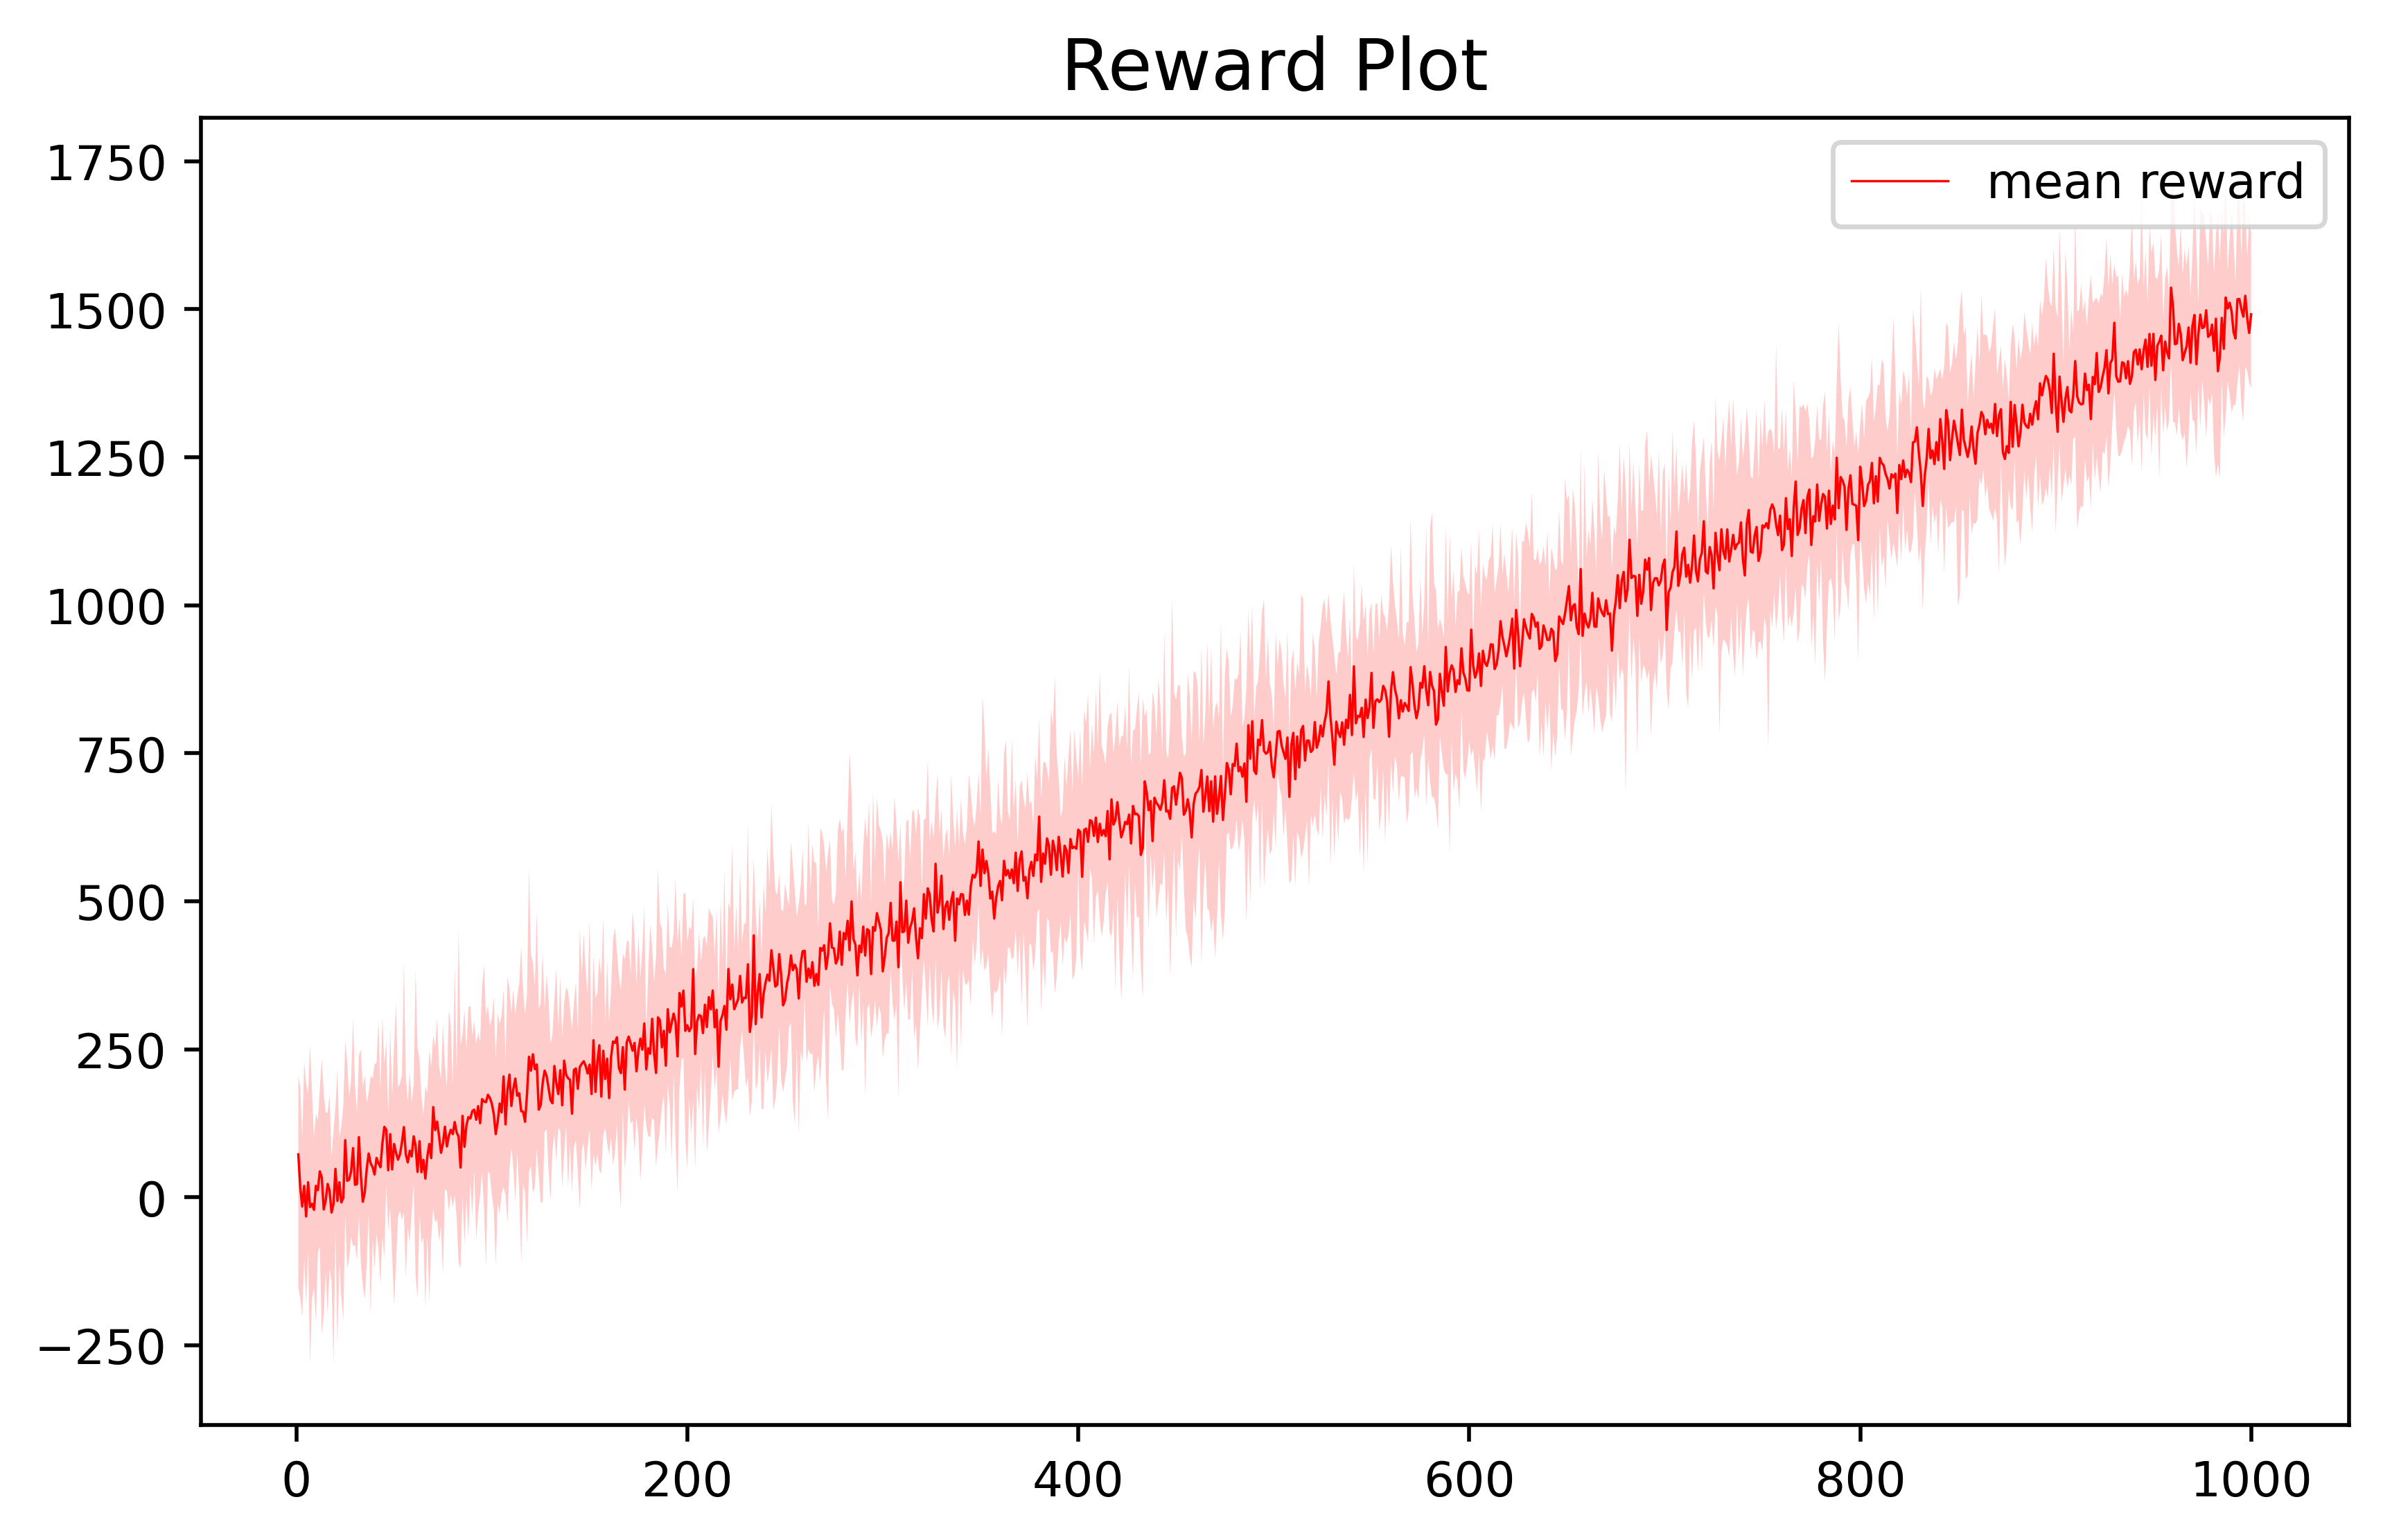

In [48]:
plt.figure(figsize=(8, 5), dpi=500)
plt.plot(iteration, mean_reward, c='r', linewidth=.5, label='mean reward')
plt.fill_between(iteration, min_reward, max_reward, 
                 facecolor='r', alpha=.2)
plt.title("Reward Plot", fontsize=15)
plt.savefig("reward.pdf")
plt.legend()
plt.show()

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
file = r"D:\迅雷下载\highway-env\scripts\diy02\reward-0.31290166398491426.xls"
data = pd.read_excel(file)
data.head(3)

,time steps,value loss,episode length,reward
0,14,1.424769,2.040680,11.548425
1,51,1.368214,5.461998,28.728259
2,69,1.355015,2.727346,15.034922


In [50]:
time_steps = data["time steps"].dropna()
value_loss = data["value loss"].dropna()
episode_length = data["episode length"].dropna()
reward = data["reward"].dropna()

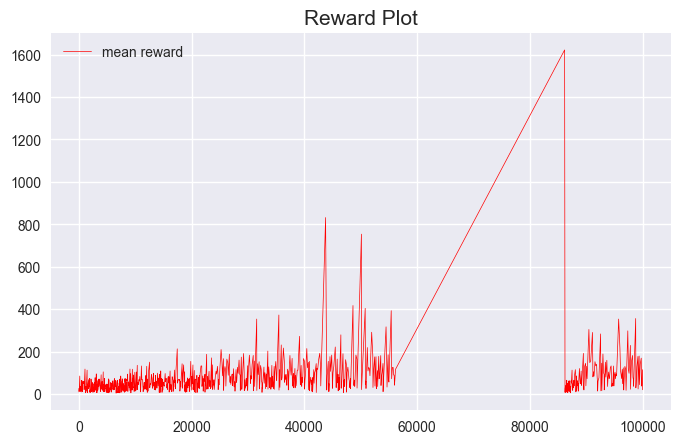

In [55]:
plt.figure(figsize=(8, 5), dpi=100)
plt.style.use('seaborn')
plt.plot(time_steps, reward, c='r', linewidth=.5, label='mean reward')
# plt.fill_between(iteration, min_reward, max_reward, facecolor='r', alpha=.2)
plt.title("Reward Plot", fontsize=15)
plt.savefig("reward_01.pdf")
plt.legend()
plt.show()